<a href="https://colab.research.google.com/github/BritneyMuller/colab-notebooks/blob/master/Updated_Prophet_Time_Series_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This Notebook was created by [Britney Muller](http://twitter.com/BritneyMuller) from Facebook's open source [Prophet time-series prediction model](https://facebook.github.io/prophet/):

#Hold Shift + Return to run the below cell and upload your timeseries.csv data.
You can use this to predict any numerical values that occur over time (sales, traffic, number of cookies you eat a day, how many widgets you sell, etc.) Note: the data below is randomized dummy data. Trends should emerge with actual time-series data.

##Your CSV formatting must look like the following.
## Columns:

###ds = month/day/year (acsending)

###y = timeseries data (make sure to remove decimals & commas)
![alt text](https://i.imgur.com/6epDG18.png)



#Run the following cell & upload your time series data

Use 3+ years worth of time series data for optimal predictions.

This first library install might take a moment.

In [1]:
# Import nessecary libraries and data. [Shift + Return to run cell]
# These are broken up into several code cells because some libraries need to be installed before others.
# It also makes it easier to see which library might be throwing an error. :)
!pip install pystan
!pip install plotly
!pip install LunarCalendar
!pip install convertdate
!pip install holidays
!pip install setuptools-git
!pip install tqdm
!pip install matplotlib
!pip install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 16.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 MB 20.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 68.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 28.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.6/149.6 kB 14.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 kB 3.3 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-pyth

In [2]:
!pip install prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
from prophet import Prophet

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
#Upload your Time Series data:
from google.colab import files
uploaded = files.upload()

Saving website-dummy-traffic.csv to website-dummy-traffic (1).csv


#Import data into a Pandas dataframe:

Change the below .csv name to match your upload!

In [9]:
import io
df = pd.read_csv(io.BytesIO(uploaded['website-dummy-traffic.csv'])) #<--CHANGE .csv name to your uploaded .csv name. Click the folder in the left panel, find your csv and copy path, paste that in the red part here.
# Dataset is now stored in a Pandas Dataframe


#Validate the dataframe's head (top 5 rows)

In [10]:
df.head()

,ds,y
2353,6/12/23,102
2354,6/13/23,137
2355,6/14/23,90
2356,6/15/23,159
2357,6/16/23,155


# Explore known dataframe types (not necessary, but good to know)

In [11]:
print(df.dtypes)

ds    object
y      int64
dtype: object


#Drop extra columns to clean up your dataframe

In [12]:
#data cleanup
#drop extra columns
df = df[['ds', 'y']]

#Reevaluate your dataframe's head (first 5 rows):

In [13]:
df.head()

,ds,y
0,1/1/17,58
1,1/2/17,150
2,1/3/17,114
3,1/4/17,37
4,1/5/17,119


##Convert to a date time

In [14]:
#df['ds'] = df['ds'].astype('datetime64[ns]')
df['ds'] = pd.to_datetime(df['ds'])

#Initialize the Model

In [15]:

# Initialize the model and specify the seasonality mode
model = Prophet(seasonality_mode='multiplicative')

# Add weekly, yearly and daily seasonality
# Note: daily seasonality is usually not used for data with larger intervals (like monthly data)
model.add_seasonality(name='weekly', period=7, fourier_order=5)
model.add_seasonality(name='yearly', period=365.25, fourier_order=10)
model.add_seasonality(name='daily', period=1, fourier_order=15)

# Fit the model to your data (assuming 'df' is your DataFrame)
model.fit(df)

INFO:prophet:Found custom seasonality named 'yearly', disabling built-in 'yearly' seasonality.
INFO:prophet:Found custom seasonality named 'weekly', disabling built-in 'weekly' seasonality.
INFO:prophet:Found custom seasonality named 'daily', disabling built-in 'daily' seasonality.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2bklkqk5/etefszbb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2bklkqk5/ukkg_3wu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=43882', 'data', 'file=/tmp/tmp2bklkqk5/etefszbb.json', 'init=/tmp/tmp2bklkqk5/ukkg_3wu.json', 'output', 'file=/tmp/tmp2bklkqk5/prophet_model7zmsds_y/prophet_model-20230614161420.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:14:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:14:21 - cmdstanpy - INFO - Chain [1] done processing


#Make predictions and plot forecast + seasonality trends:

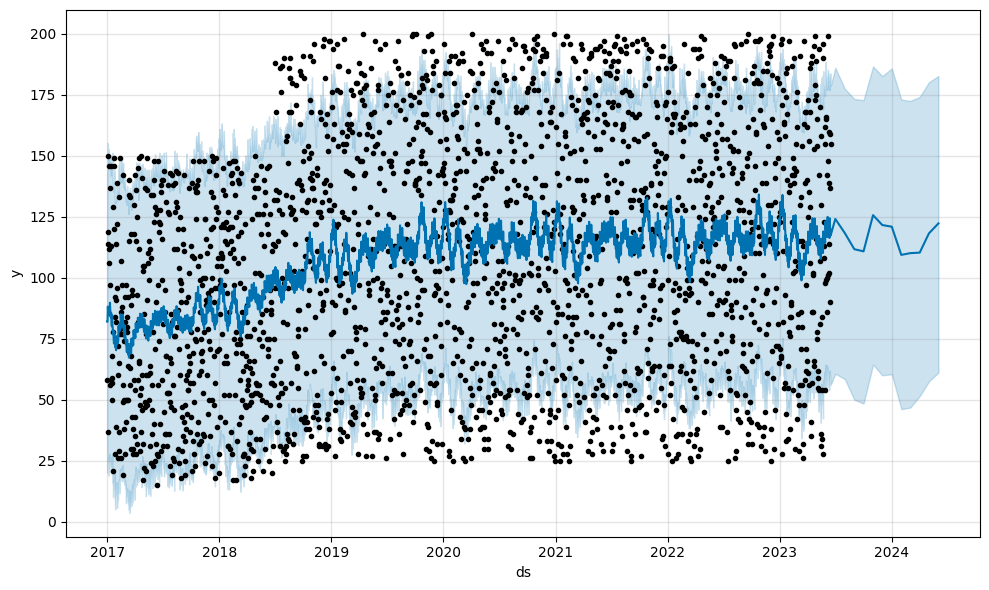

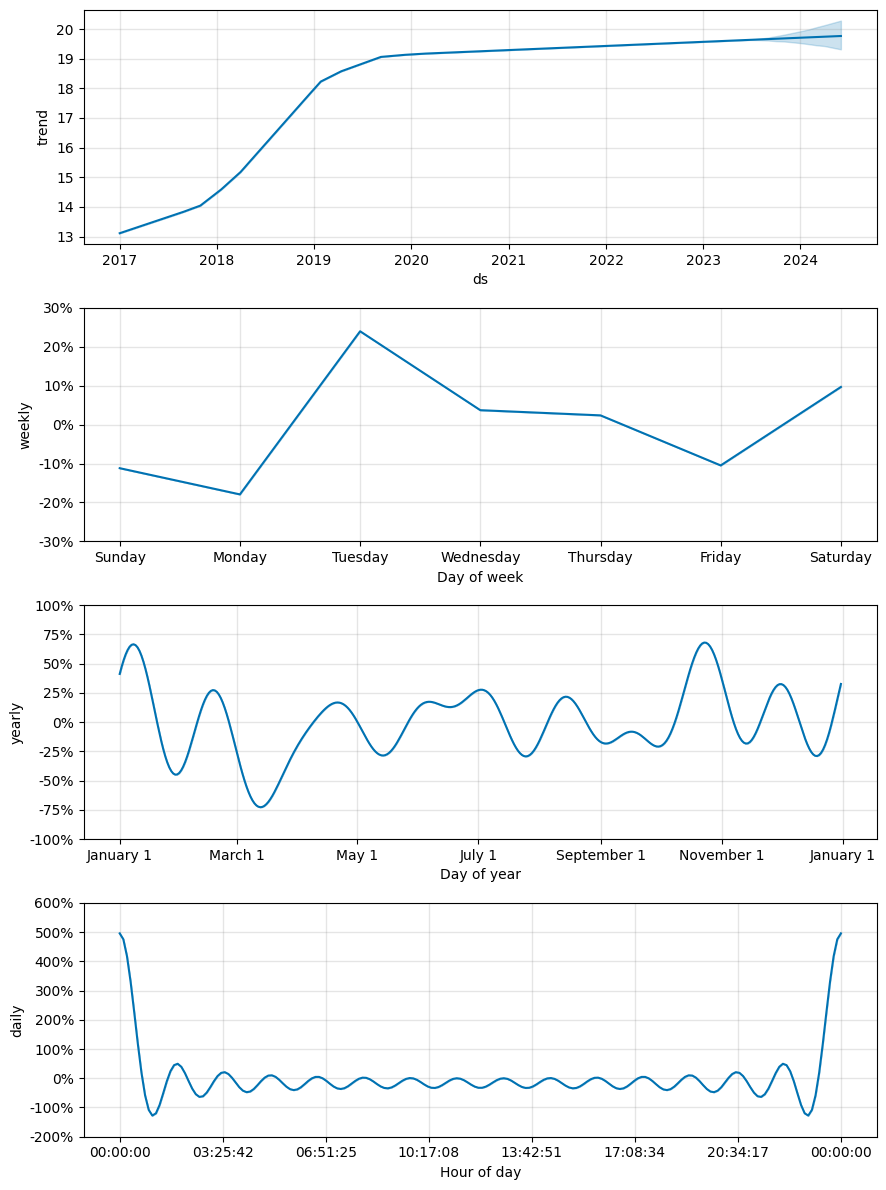

In [16]:
# Create a DataFrame to hold your future predictions
future = model.make_future_dataframe(periods=12, freq='MS')  # Predict the next year

# Use the model to make predictions
forecast = model.predict(future)

# Plot the forecast
model.plot(forecast)
plt.show()

# Plot the components
fig = model.plot_components(forecast)

#Train/Test Model

Don't forget to paste your CSV path below!

In [17]:
# Import necessary libraries
import pandas as pd

# Load your data
df = pd.read_csv('website-dummy-traffic.csv')

# Make sure the date column is in the datetime format
df['ds'] = pd.to_datetime(df['ds'])

# Calculate the point at which to split the data
split_point = int(len(df) * 0.8)

# Split the data
train = df.iloc[:split_point]
test = df.iloc[split_point:]

#Train a simple Prophet model on the training data

In [18]:
from prophet import Prophet

# Initialize the model and specify the seasonality mode
model = Prophet(seasonality_mode='multiplicative')

# Fit the model to your training data
model.fit(train)

# Create a DataFrame to hold your future predictions
future = model.make_future_dataframe(periods=len(test), freq='MS')

# Use the model to make predictions
forecast = model.predict(future)


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2bklkqk5/hwh832t2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2bklkqk5/srldaosb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=33483', 'data', 'file=/tmp/tmp2bklkqk5/hwh832t2.json', 'init=/tmp/tmp2bklkqk5/srldaosb.json', 'output', 'file=/tmp/tmp2bklkqk5/prophet_modelmeglallj/prophet_model-20230614161433.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:14:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:14:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


#Compare Forecast to Actuals

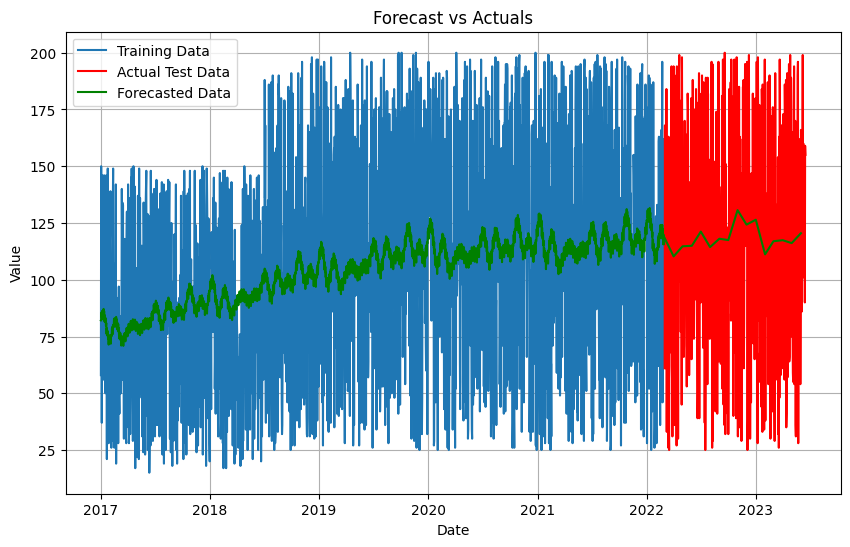

In [21]:
import matplotlib.pyplot as plt

#plt.style.use('fivethirtyeight')  # Set the style

# Plot the original data
plt.figure(figsize=(10, 6))
plt.plot(train['ds'], train['y'], label='Training Data')
plt.plot(test['ds'], test['y'], 'r', label='Actual Test Data')

# Filter forecast to dates up to the end of the actual data
forecast_filtered = forecast[forecast['ds'] <= max(test['ds'])]

# Plot the forecasted data
plt.plot(forecast_filtered['ds'], forecast_filtered['yhat'], 'g', label='Forecasted Data')

plt.legend()
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Forecast vs Actuals')
plt.grid(True)
plt.show()


#Evaluate Performance (how much did your actual data outperform or underperform the forecast)

In [26]:
# Merge the forecast with the actuals
merged = forecast_filtered.merge(test, on='ds', how='inner')

# Calculate point difference and percentage difference
merged['point_difference'] = merged['y'] - merged['yhat']
merged['percentage_difference'] = (merged['y'] - merged['yhat']) / merged['y'] * 100

# Print the average point difference and average percentage difference
avg_point_diff = np.mean(merged['point_difference'])
avg_perc_diff = np.mean(merged['percentage_difference'])

print(f"Average Point Difference: {avg_point_diff}")
print(f"Average Percentage Difference: {avg_perc_diff}")


Average Point Difference: 4.55079656872306
Average Percentage Difference: -21.01058675010729


#Evaluate Daily Performance (how much did actuals outperform or underperform the forecast)

In [27]:
# Display the point difference and percentage difference for the first 5 days
print(merged[['ds', 'point_difference', 'percentage_difference']].head())


          ds  point_difference  percentage_difference
0 2022-04-01         83.708866              43.148900
1 2022-05-01         15.271738              11.747491
2 2022-06-01          9.030964               7.283036
3 2022-07-01        -31.217717             -34.686352
4 2022-08-01         37.622818              24.751854


#Predict future month

In [28]:
# Future Month predictions
# Create a subset of the forecast data for the first month of predictions
# This selects all rows from the forecast where the date is less than or equal to the maximum date in the training data plus one month
first_month_forecast = forecast[(forecast['ds'] > train['ds'].max()) & (forecast['ds'] <= (train['ds'].max() + pd.DateOffset(months=1)))]

# Display the first month forecast
print(first_month_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])


             ds        yhat  yhat_lower  yhat_upper
1886 2022-04-01  110.291134   54.733193  176.231857


#Performance Metrics

In [30]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# First we need to merge the forecast with the test set to compare
merged = forecast_filtered.merge(test, on='ds', how='inner')

# Calculate errors
mae = mean_absolute_error(merged['y'], merged['yhat'])
mape = np.mean(np.abs((merged['y'] - merged['yhat']) / merged['y'])) * 100
rmse = np.sqrt(mean_squared_error(merged['y'], merged['yhat']))

# Print errors
print(f"MAE: {mae}")
print(f"MAPE: {mape}")
print(f"RMSE: {rmse}")

MAE: 42.341914215185575
MAPE: 48.78807297870866
RMSE: 47.83603690298904


#Add Holiday Data (Seasonality info) to try and improve your model


In [31]:
from pandas.tseries.holiday import USFederalHolidayCalendar

# Generate US federal holidays
holidays = USFederalHolidayCalendar().holidays(start=train['ds'].min(), end=train['ds'].max())

# Convert the holidays to the format expected by Prophet
holidays = pd.DataFrame({
  'holiday': 'us_federal_holiday',
  'ds': pd.to_datetime(holidays),
  'lower_window': 0,
  'upper_window': 1,
})

# Initialize the model and specify the seasonality mode
model = Prophet(seasonality_mode='multiplicative', holidays=holidays)

# Add yearly seasonality
model.add_seasonality(name='yearly', period=365.25, fourier_order=5)

# Fit the model to your data
model.fit(train)

# Create a DataFrame to hold your future predictions
future = model.make_future_dataframe(periods=len(test), freq='MS')

# Use the model to make predictions
forecast = model.predict(future)


INFO:prophet:Found custom seasonality named 'yearly', disabling built-in 'yearly' seasonality.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2bklkqk5/riv3a8u9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2bklkqk5/rpxbuznp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=76736', 'data', 'file=/tmp/tmp2bklkqk5/riv3a8u9.json', 'init=/tmp/tmp2bklkqk5/rpxbuznp.json', 'output', 'file=/tmp/tmp2bklkqk5/prophet_modelrrkjf8h8/prophet_model-20230614162220.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:22:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:22:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


#Re-evaluate Model Performance

In [35]:
# Fit the Prophet model with holiday data
model_with_holidays = Prophet(holidays=holidays)
model_with_holidays.fit(train)

# Generate forecast
forecast_holidays = model_with_holidays.predict(test)

# Use the forecast to compute the errors
# Import necessary libraries
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Filter forecasts to the same dates as the test data
forecast_holidays_filtered = forecast_holidays[forecast_holidays['ds'].isin(test['ds'])]

# Merge the filtered forecasts with the test data
merged_holidays = forecast_holidays_filtered.merge(test, on='ds', how='inner')

# Compute errors
mae_holidays = mean_absolute_error(merged_holidays['y'], merged_holidays['yhat'])
mape_holidays = np.mean(np.abs((merged_holidays['y'] - merged_holidays['yhat']) / merged_holidays['y'])) * 100
rmse_holidays = np.sqrt(mean_squared_error(merged_holidays['y'], merged_holidays['yhat']))

# Print errors
print(f"MAE with Holidays: {mae_holidays}")
print(f"MAPE with Holidays: {mape_holidays}")
print(f"RMSE with Holidays: {rmse_holidays}")

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2bklkqk5/vwcqom1h.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2bklkqk5/067_a7co.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=44649', 'data', 'file=/tmp/tmp2bklkqk5/vwcqom1h.json', 'init=/tmp/tmp2bklkqk5/067_a7co.json', 'output', 'file=/tmp/tmp2bklkqk5/prophet_modelmz9ic67f/prophet_model-20230614162454.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:24:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:24:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


MAE with Holidays: 42.76713738971701
MAPE with Holidays: 58.663468124927476
RMSE with Holidays: 49.884134991999716


#Extract holiday impact (if any)


In [36]:
# Extract holiday impacts
holidays_impact = model.predict(future)[['ds'] + holidays['holiday'].unique().tolist()]

# Set date as index
holidays_impact.set_index('ds', inplace=True)

# Calculate the mean absolute impact of each holiday
holidays_impact = holidays_impact.abs().mean().sort_values(ascending=False)

# Print the impact
print(holidays_impact)


us_federal_holiday    0.000036
dtype: float64
